In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/climate change/GlobalLandTemperaturesByCountry.csv')

In [6]:
#Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None


In [7]:
# Show the first few rows
print(df.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


In [8]:
# Check missing values
print(df.isnull().sum())

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64


In [12]:
# Drop rows with missing temperature data
df = df.dropna(subset=['AverageTemperature'])
print(df.dropna())

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
5       1744-04-01               1.530                          4.680   
6       1744-05-01               6.702                          1.789   
7       1744-06-01              11.609                          1.577   
8       1744-07-01              15.342                          1.410   
...            ...                 ...                            ...   
577456  2013-04-01              21.142                          0.495   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   

         Country  
0          Åland  
5          Åland  
6          Åland  
7          Åland  
8          Åland  
...      

In [18]:
# Convert the 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])
print(df)

               dt  AverageTemperature  AverageTemperatureUncertainty   Country
0      1743-11-01               4.384                          2.294     Åland
5      1744-04-01               1.530                          4.680     Åland
6      1744-05-01               6.702                          1.789     Åland
7      1744-06-01              11.609                          1.577     Åland
8      1744-07-01              15.342                          1.410     Åland
...           ...                 ...                            ...       ...
577456 2013-04-01              21.142                          0.495  Zimbabwe
577457 2013-05-01              19.059                          1.022  Zimbabwe
577458 2013-06-01              17.613                          0.473  Zimbabwe
577459 2013-07-01              17.000                          0.453  Zimbabwe
577460 2013-08-01              19.759                          0.717  Zimbabwe

[544811 rows x 4 columns]


In [15]:
# Example: Analyze the temperature trend for a specific country (e.g., 'India')
india_df = df[df['Country'] == 'India']
print(india_df)

               dt  AverageTemperature  AverageTemperatureUncertainty Country
243695 1796-01-01              17.044                          2.044   India
243696 1796-02-01              19.193                          1.359   India
243697 1796-03-01              22.319                          2.125   India
243698 1796-04-01              27.233                          1.510   India
243699 1796-05-01              30.035                          1.338   India
...           ...                 ...                            ...     ...
246302 2013-04-01              27.981                          0.299   India
246303 2013-05-01              31.014                          0.205   India
246304 2013-06-01              28.766                          0.299   India
246305 2013-07-01              27.012                          0.197   India
246306 2013-08-01              26.555                          0.242   India

[2508 rows x 4 columns]


In [16]:
# Group by year and calculate the mean temperature
india_df['Year'] = india_df['dt'].dt.year
yearly_avg_temp = india_df.groupby('Year')['AverageTemperature'].mean()

<ipython-input-16-a1133dc2cd1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['Year'] = india_df['dt'].dt.year


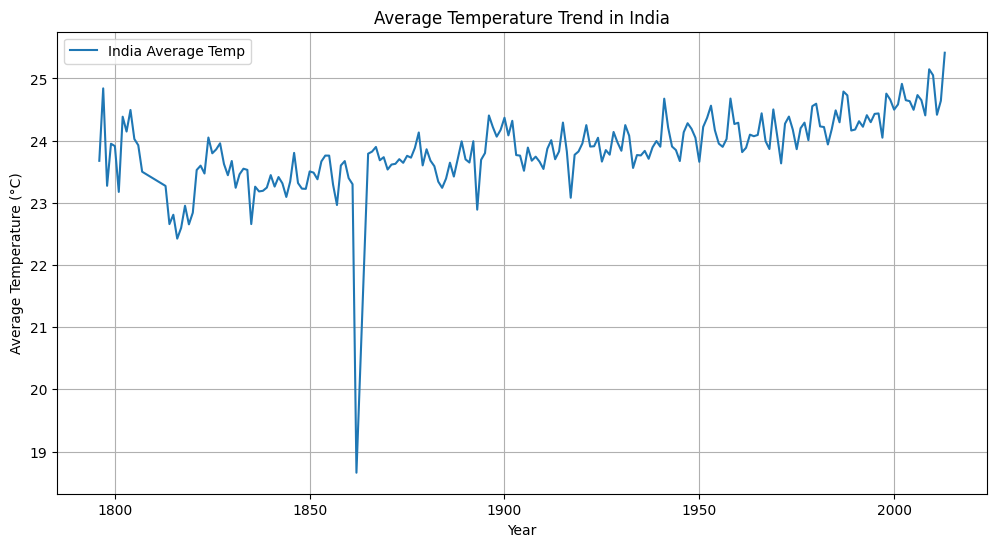

In [17]:
# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label='India Average Temp')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Trend in India')
plt.legend()
plt.grid(True)
plt.show()